In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
from itertools import cycle
filename="20180413_3.bin" #this data set is an extremely short video recorded with a hand held d435
height=480
width=848
cycol = cycle('bgrcmk') #here I'm generating a list of colors I can plot

In [3]:
frames = np.fromfile(filename, dtype=np.uint16) #A highly efficient way of reading binary data with a known data-type, as well as parsing simply formatted text files. Data written using the tofile method can be read using this function.
reshaped = frames.reshape(-1, height, width) #.reshape simply restructures data into dimensions of your choosing. -1 means find the number of segments that structures the data into the dimnesions shown afterwards

In [3]:
!wc -c depthdata.bin #this is a unix command to get the number of bytes in a binary file. Because our data is uint16, each pixel is two bytes

 135137280 depthdata.bin


In [4]:
print(reshaped.shape) #returns the shape of the data. First number is number of frames
#note that the nubmers below are one greater than the actual indices that exist
#there is no reshaped[number_of_frames,height,width], the last frame is reshaped[number_of_frames-1,height-1,width-1]

(22999, 480, 848)


In [5]:
number_of_frames=reshaped.shape[0] #set number of frames equal to the first element in reshaped.shape

In [6]:
print(reshaped[100,100,100]) #print a pixel located at 100,100 in the 100th frame

0


In [7]:
#Here I create np.array containing the value of a single pixel over all the frames of the data
#first, I choose a pixel
rand_height=random.randint(0,height-1) #random pixel's height is between 1 and the height of the video
rand_width=random.randint(0,width-1) #random pixel's width is between 1 and the width of the video

#pixel_values_over_time=np.zeros([number_of_frames]) #first I create an empty array of zeros
pixel_values_over_time=[]
for a_frame in range(0,number_of_frames): #the for loop starts at the first index and goes until for the number of frames
    current_pixel_value=reshaped[a_frame,rand_height,rand_width] #the current pixel is equal to the value fo reshaped at the frame number specified by the loop and at the pixel location specified by random.randomint
    pixel_values_over_time=np.append(pixel_values_over_time,current_pixel_value) #append the current pixel value to empty pixel_values_over_time array
    
print(rand_height,rand_width)
print(pixel_values_over_time)

90 361
[684. 682. 683. ... 686. 681. 683.]


In [8]:
print(pixel_values_over_time.size) #use size instead of shape because it's one dimensional.

22999


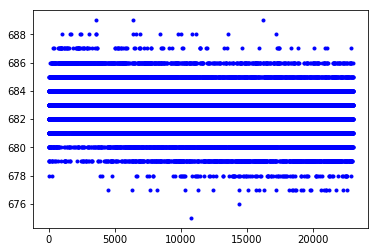

In [9]:
plt.plot([range(0,pixel_values_over_time.size)],[pixel_values_over_time],'b.') #plotting the pixel over time
plt.show() #showing the plot 

In [10]:
#now let's say I want to look at how much the pixel deviated from it's starting position.
#I want to subtract all values of in the array by the value in the first position in the array.

In [11]:
change_in_pixel_values_over_time=pixel_values_over_time-pixel_values_over_time[0]

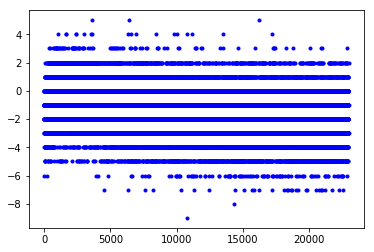

In [12]:
plt.plot([range(0,change_in_pixel_values_over_time.size)],[change_in_pixel_values_over_time],'b.') #plotting the pixel over time
plt.show() #showing the plot 

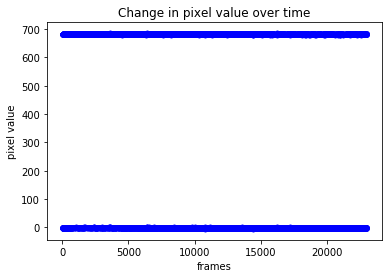

In [13]:
#LOOK HOW EASY IT IS TO PUT TWO THINGS ON THE SAME PLOT (and add basic labels)
plt.plot([range(0,change_in_pixel_values_over_time.size)],[change_in_pixel_values_over_time],'b.') #plotting the pixel over time
plt.plot([range(0,pixel_values_over_time.size)],[pixel_values_over_time],'b.') #plotting the pixel over time
plt.xlabel('frames')
plt.ylabel('pixel value')
plt.title('Change in pixel value over time')
plt.show() #showing the plot 

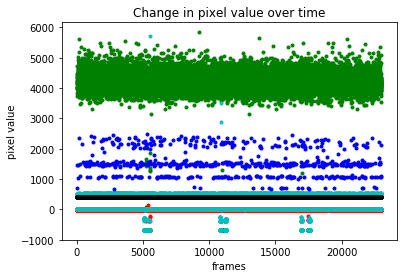

In [14]:
#Now I want to plot SEVERAL the pixels over time
number_of_pixels_I_want_to_plot=10;
for n in range(0,number_of_pixels_I_want_to_plot):
    rand_height=random.randint(0,height-1) #random pixel's height is between 1 and the height of the video
    rand_width=random.randint(0,width-1) #random pixel's width is between 1 and the width of the video

    #pixel_values_over_time=np.zeros([number_of_frames]) #first I create an empty array of zeros
    pixel_values_over_time=[]
    for a_frame in range(0,number_of_frames): #the for loop starts at the first index and goes until for the number of frames
        current_pixel_value=reshaped[a_frame,rand_height,rand_width] #the current pixel is equal to the value fo reshaped at the frame number specified by the loop and at the pixel location specified by random.randomint
        pixel_values_over_time=np.append(pixel_values_over_time,current_pixel_value) #append the current pixel value to empty pixel_values_over_time array
        change_in_pixel_values_over_time=pixel_values_over_time-pixel_values_over_time[0]
    plt.plot([range(0,change_in_pixel_values_over_time.size)],[change_in_pixel_values_over_time],marker='.',linestyle='-',color=next(cycol)) #plotting the pixel over time for some reason plotting the line doesnt work, only plotting the . or + works
plt.xlabel('frames')
plt.ylabel('pixel value')
plt.title('Change in pixel value over time')
plt.show()


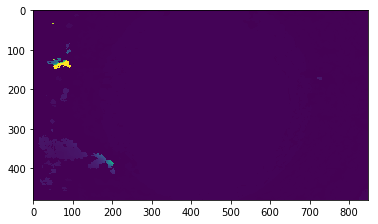

In [4]:
x=plt.imshow(reshaped[51])

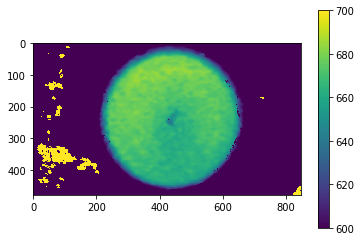

In [5]:
x=plt.colorbar(plt.imshow(reshaped[51]))
plt.clim(600,700)

In [6]:
import matplotlib.colors as mcol
import matplotlib.cm as cm

In [7]:
print(np.amax(reshaped[51]))

65535


In [8]:
print(np.amin(reshaped[51]))

0


In [9]:
maxvalue=700
minvalue=600
pixelrange = range(minvalue,maxvalue+1)

In [10]:
cm1 = mcol.LinearSegmentedColormap.from_list("RedtoBlueColorMap",["r","b"])

In [11]:
cnorm = mcol.Normalize(vmin=min(pixelrange),vmax=max(pixelrange))

In [12]:
cpick = cm.ScalarMappable(norm=cnorm,cmap=cm1)
cpick.set_array([])

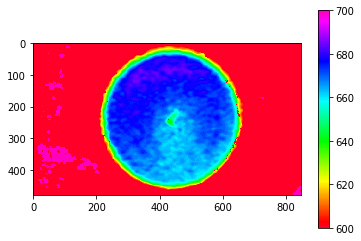

In [13]:
#plt.colorbar(plt.imshow(reshaped[51],cmap='jet'))
plt.colorbar(plt.imshow(reshaped[51],cmap='gist_rainbow'))
plt.clim(600,700)

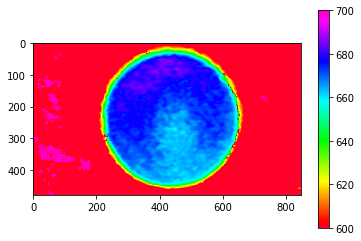

In [14]:
plt.colorbar(plt.imshow(reshaped[5300],cmap='gist_rainbow'))
plt.clim(600,700)

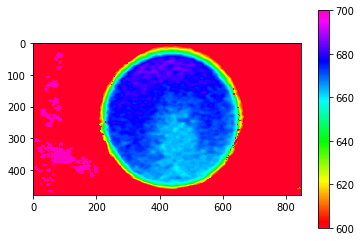

In [15]:
plt.colorbar(plt.imshow(reshaped[5350],cmap='gist_rainbow'))
plt.clim(600,700)

In [16]:
background=np.mean(reshaped[5300:5350], axis=0)
#backgroundvar=np.var(reshaped[0],reshaped[1],reshaped[2],reshaped[3])

In [17]:
print(background)

[[  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.     0.     0.   ...   6.42   0.     0.  ]
 [  0.     0.     0.   ...  25.62   0.     0.  ]
 ...
 [  0.     0.     0.   ... 551.24 540.12   0.  ]
 [  0.     0.     0.   ... 539.44 461.42   0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]]


In [18]:
print(background.shape)

(480, 848)


In [84]:
subtracted=reshaped[51]-background
print(subtracted)

[[  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.     0.     0.   ...  -6.42   0.     0.  ]
 [  0.     0.     0.   ... -25.62   0.     0.  ]
 ...
 [  0.     0.     0.   ... 449.76 459.88   0.  ]
 [  0.     0.     0.   ... 461.56 538.58   0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]]


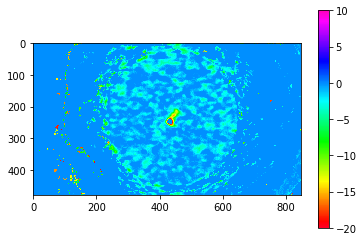

In [77]:
plt.colorbar(plt.imshow(subtracted,cmap='gist_rainbow'))
plt.clim(-20,10)

In [34]:
np.amax(subtracted)

65535.0

In [78]:
print(subtracted[230,440])

-14.120000000000005


In [93]:
subtractedmod=subtracted

In [94]:
subtractedmod[subtractedmod>0]=0
subtractedmod[subtractedmod<-30]=0

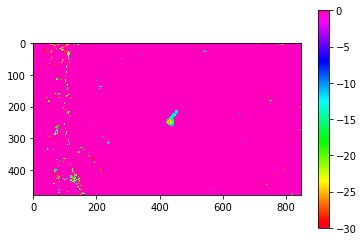

In [96]:
plt.colorbar(plt.imshow(subtractedmod,cmap='gist_rainbow'))
plt.clim(-30,0)

In [97]:
print(np.amin(subtractedmod))

-30.0


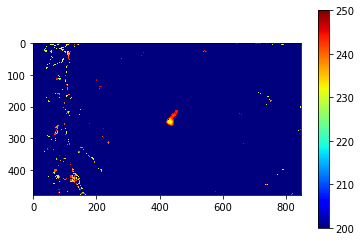

In [129]:
import cv2
filtered=cv2.medianBlur(subtractedmod.astype(np.uint8), 1) #has to be uint8 in order to use cv2 threshold and median filtering
plt.colorbar(plt.imshow(filtered,cmap='jet'))
plt.clim(200,250)

In [127]:
print(filtered)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [106]:
print(np.amax(filtered))

245
